# Analysis of Global Countries' Covid-19 Pandemic Responses

##### Overview: 
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.

##### Goals: 
1. Determine if countries with earlier mandates handled Coronavirus better than countries who waited longer to impose mandates.
2. Determine mortality rate v age and see who is most susceptible to contracting Coronavirus
3. Determine if comorbidity leads to higher mortality rates

##### Sources:
- https://ourworldindata.org/covid-cases?country=USA~CHN~JPN 
- https://ourworldindata.org/policy-responses-covid#face-coverings 

##### Tools: 
- Jupyter Notebook
- Pandas 
- Matplotlib 
- SciPy 
- Seaborn

##### Hypothesis: Countries with stricter mandates would be more successful in limiting both the spread and lethality of Covid-19.

In [1]:
# Import Dependencies
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from numpy.polynomial.polynomial import polyfit
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read CSV files 
data = pd.read_csv("oxford_clean.csv")
# data.head()

In [3]:
# Select only mandates columns
mandates = pd.DataFrame(data, columns = ["CountryName", "Date", "C1_School_closing", "C2_Workplace_closing", \
                                         "C6_Stay_home_requirements", "E1_Income_support", "H6_Facial_coverings"]) 

# Rename columns
mandates.columns = ["Country_name", "Date", "School_closing", "Workplace_closing", "Stay_home", "Income_support", "Facial_coverings"]

# Format 'Date' from YYYYMMDD to DD/MM/YYYY
mandates['Date'] = pd.to_datetime(mandates['Date'], format='%Y%m%d')

mandates.dropna()
mandates.head()

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Income_support,Facial_coverings
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0


### School Mandates

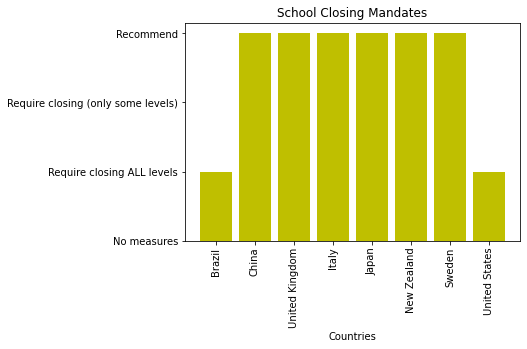

In [4]:
# Create bar plot displaying level of mandate for School Closing Mandates for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['School_Mandates'] = ''

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['School_closing'] == 0), 'School_Mandates'] = 'No measures'
mandates.loc[(mandates['School_closing'] == 1), 'School_Mandates'] = 'Recommend'
mandates.loc[(mandates['School_closing'] == 2), 'School_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['School_closing'] == 3), 'School_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'],mandates['School_Mandates'], color = 'y')
plt.xticks(rotation='vertical')
plt.title('School Closing Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/School_Closing_Mandates.png')
plt.show()

### Workplace Mandates

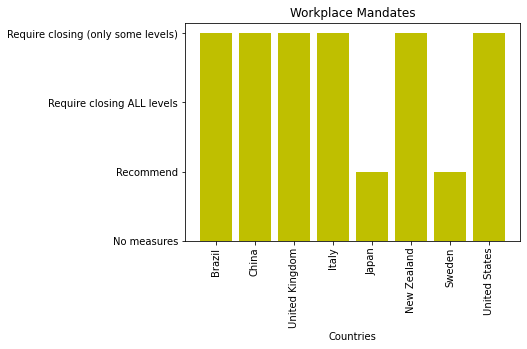

In [5]:
# Create bar plot displaying level of mandate for Workplace Closing Mandates for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Work_Mandates'] = ''

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Workplace_closing'] == 0), 'Work_Mandates'] = 'No measures'
mandates.loc[(mandates['Workplace_closing'] == 1), 'Work_Mandates'] = 'Recommend'
mandates.loc[(mandates['Workplace_closing'] == 2), 'Work_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['Workplace_closing'] == 3), 'Work_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'],mandates['Work_Mandates'], color = 'y')
plt.xticks(rotation='vertical')
plt.title('Workplace Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Workplace_Mandates.png')
plt.show()

### Stay Home Mandates

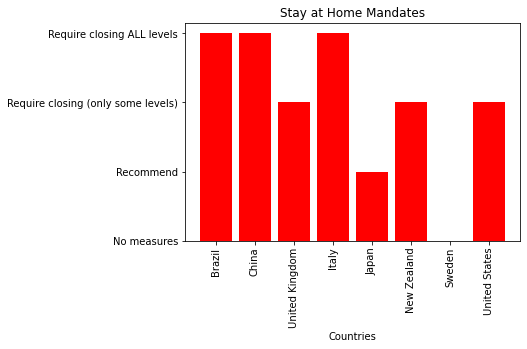

In [6]:
# Create bar plot displaying level of mandate for Stay at Home Requirements for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Stay_Home_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Stay_home'] == 0), 'Stay_Home_Mandates'] = 'No measures'
mandates.loc[(mandates['Stay_home'] == 1), 'Stay_Home_Mandates'] = 'Recommend'
mandates.loc[(mandates['Stay_home'] == 2), 'Stay_Home_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['Stay_home'] == 3), 'Stay_Home_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'],mandates['Stay_Home_Mandates'], color = 'r')
plt.xticks(rotation='vertical')
plt.title('Stay at Home Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Stay_Home_Mandates.png')
plt.show()

### Income Support Mandates

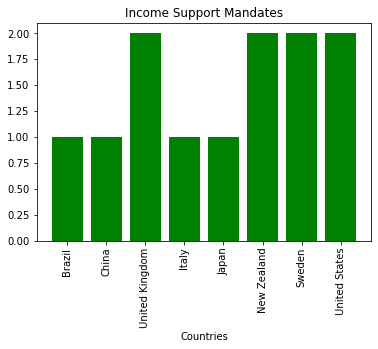

In [7]:
# Create bar plot displaying level of mandate for Income Support for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Income_Support_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Income_support'] == 0), 'Income_Support_Mandates'] = 'No measures'
mandates.loc[(mandates['Income_support'] == 1), 'Income_Support_Mandates'] = 'Gov replace less 50% salary lost'
mandates.loc[(mandates['Income_support'] == 2), 'Income_Support_Mandates'] = 'Gov replace 50% or more salary lost'

plt.bar(mandates['Country_name'],mandates['Income_support'], color = 'g')
plt.xticks(rotation='vertical')
plt.title('Income Support Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Income_Support_Mandates.png')
plt.show()

### Facial Coverings Mandates

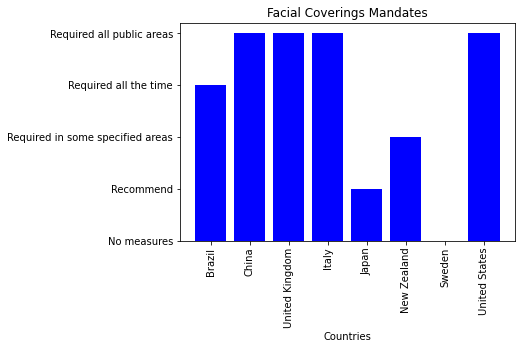

In [8]:
# Create bar plot displaying level of mandate for Facial Coverings for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['School_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Facial_coverings'] == 0), 'Mask_Mandate'] = 'No measures'
mandates.loc[(mandates['Facial_coverings'] == 1), 'Mask_Mandate'] = 'Recommend'
mandates.loc[(mandates['Facial_coverings'] == 2), 'Mask_Mandate'] = 'Required in some specified areas'
mandates.loc[(mandates['Facial_coverings'] == 3), 'Mask_Mandate'] = 'Required all public areas'
mandates.loc[(mandates['Facial_coverings'] == 4), 'Mask_Mandate'] = 'Required all the time'

plt.bar(mandates['Country_name'],mandates['Mask_Mandate'], color = 'b')
plt.xticks(rotation='vertical')
plt.title('Facial Coverings Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Facial_Coverings_Mandates.png')
plt.show()

In [9]:
# Transpose the .describe so I can run mean on 50% column to find what countries issued relaxed mandates and 
# which had strict mandates

# Change the value of columns from float to integer
info = mandates.astype({'School_closing': 'int', 'Workplace_closing': 'int', 'Stay_home': 'int', \
                            'Income_support': 'int', 'Facial_coverings': 'int'}) 
info.dropna()
info.describe().T

,count,mean,std,min,25%,50%,75%,max
School_closing,2410.0,1.697095,1.305365,0.0,0.0,2.0,3.0,3.0
Workplace_closing,2410.0,1.480083,1.184784,0.0,0.0,2.0,3.0,3.0
Stay_home,2410.0,0.966805,1.034351,0.0,0.0,1.0,2.0,3.0
Income_support,2410.0,1.091701,0.803876,0.0,0.0,1.0,2.0,2.0
Facial_coverings,2410.0,1.462241,1.609832,0.0,0.0,1.0,3.0,4.0


In [10]:
# Everything below 1.4 is relaxed mandate country. everything above is strict country
info_mean = info.describe().T['50%'].mean()
info_mean

1.4

In [11]:
# Brazil country by itself with total mean labeled as brazil total and insight summary df for looking to see if there is any further insights to explore
brazil = info.loc[info['Country_name']=='Brazil']
brazil_mean = brazil.mean()
brazil_sum = brazil_mean.sum()
brazil_total = (brazil_sum/5)

# China country by itself with total mean labeled as china total and insight summary df for looking to see if there is any further insights to explore
china = info.loc[info['Country_name']=='China']
china_mean = china.mean()
china_sum = china_mean.sum()
china_total = (china_sum/5)

# UK country by itself with total mean labeled as uk total and insight summary df for looking to see if there is any further insights to explore
uk = info.loc[info['Country_name']=='United Kingdom']
uk_mean = uk.mean()
uk_sum = uk_mean.sum()
uk_total = (uk_sum/5)

# Italy country by itself with total mean labeled as italy total and insight summary df for looking to see if there is any further insights to explore
italy = info.loc[info['Country_name']=='Italy']
italy_mean = italy.mean()
italy_sum = italy_mean.sum()
italy_total = (italy_sum/5)

# Japan country by itself with total mean labeled as japan total and insight summary df for looking to see if there is any further insights to explore
japan = info.loc[info['Country_name']=='Japan']
japan_mean = japan.mean()
japan_sum = japan_mean.sum()
japan_total = (japan_sum/5)

# New Zealand country by itself with total mean labeled as New Zealand total and insight summary df for looking to see if there is any further insights to explore
nz = info.loc[info['Country_name']=='New Zealand']
nz_mean = nz.mean()
nz_sum = nz_mean.sum()
nz_total = (nz_sum/5)

# Sweden country by itself with total mean labeled as sweden total and insight summary df for looking to see if there is any further insights to explore
meatball = info.loc[info['Country_name']=='Sweden']
meatball_mean = meatball.mean()
meatball_sum = meatball_mean.sum()
meatball_total = (meatball_sum/5)

# United States country by itself with total mean labeled as united states total and insight summary df for looking to see if there is any further insights to explore
us = info.loc[info['Country_name']=='United States']
us_mean = us.mean()
us_sum = us_mean.sum()
us_total = (us_sum/5)

#summary df with country and average mandate
total = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Average Mandate':[china_total, brazil_total, us_total, italy_total,
                           uk_total,japan_total, nz_total, meatball_total]}

sum_df = pd.DataFrame(total)


#summary df with country and average mandate
total = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Average Mandate':[china_total, brazil_total, us_total, italy_total,
                           uk_total,japan_total, nz_total, meatball_total]}


sum_df = pd.DataFrame(total)

sum_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [12]:
#1.4 was the mean of the 50% column above on .describe(), making the df below the Strict countries
strict_df = sum_df.loc[sum_df['Average Mandate']>=1.4]
strict_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946


In [13]:
##1.4 was the mean of the 50% column above on .describe(), making the df below the relax countries
lax_df = sum_df.loc[sum_df['Average Mandate']<=1.4]
lax_df

,Country,Average Mandate
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [14]:
#brazil max number of cases
brazil= data.loc[data['CountryName']=='Brazil']
brazil_max = brazil['ConfirmedCases'].max()
brazil_max

#china max number of cases
china= data.loc[data['CountryName']=='China']
china_max = china['ConfirmedCases'].max()
china_max

#us max number of cases
us= data.loc[data['CountryName']=='United States']
us_max = us['ConfirmedCases'].max()
us_max

#italy max number of cases
italy= data.loc[data['CountryName']=='Italy']
italy_max = italy['ConfirmedCases'].max()
italy_max

#uk max number of cases
uk= data.loc[data['CountryName']=='United Kingdom']
uk_max = uk['ConfirmedCases'].max()
uk_max

#japan max number of cases
japan= data.loc[data['CountryName']=='Japan']
japan_max = japan['ConfirmedCases'].max()
japan_max

#new zealand max number of cases
nz= data.loc[data['CountryName']=='New Zealand']
nz_max = nz['ConfirmedCases'].max()
nz_max

#sweden max number of cases
meatball= data.loc[data['CountryName']=='Sweden']
meatball_max = meatball['ConfirmedCases'].max()
meatball_max

#summary df of country and total cases
totals = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Cases':[china_max, brazil_max, us_max, italy_max,
                           uk_max,japan_max, nz_max, meatball_max]}


totals_df = pd.DataFrame(totals)

totals_df

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [15]:
#summary df with strict mandate country total confirmed cases
strict_max = totals_df.loc[totals_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_max

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0


In [16]:
#summary df with relaxed mandate country total confirmed cases
lax_max = totals_df.loc[totals_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_max

,Country,Confirmed Cases
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [17]:
#brazil max number of deaths
brazil= data.loc[data['CountryName']=='Brazil']
brazil_d = brazil['ConfirmedDeaths'].max()

#china max number of deaths
china= data.loc[data['CountryName']=='China']
china_d = china['ConfirmedDeaths'].max()

#US max number of deaths
us= data.loc[data['CountryName']=='United States']
us_d = us['ConfirmedDeaths'].max()

#italy max number of deaths
italy= data.loc[data['CountryName']=='Italy']
italy_d = italy['ConfirmedDeaths'].max()

#uk max number of deaths
uk= data.loc[data['CountryName']=='United Kingdom']
uk_d = uk['ConfirmedDeaths'].max()


#japan max number of deaths
japan= data.loc[data['CountryName']=='Japan']
japan_d = japan['ConfirmedDeaths'].max()

#new zealnd max number of deaths
nz= data.loc[data['CountryName']=='New Zealand']
nz_d = nz['ConfirmedDeaths'].max()

#sweden max number of deaths
meatball= data.loc[data['CountryName']=='Sweden']
meatball_d = meatball['ConfirmedDeaths'].max()


#summary df of country and total deaths
total_d = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Deaths':[china_d, brazil_d, us_d, italy_d,
                           uk_d,japan_d, nz_d, meatball_d]}


death_df = pd.DataFrame(total_d)

In [18]:
#summary df with strict mandate country total confirmed deaths
strict_d = death_df.loc[death_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_d

,Country,Confirmed Deaths
0,China,4739.0
1,Brazil,157946.0
2,United States,224899.0
3,Italy,36832.0


In [19]:
#summary df with relaxed mandate country total confirmed deaths
lax_d = death_df.loc[death_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_d

,Country,Confirmed Deaths
4,United Kingdom,46717.0
5,Japan,1774.0
6,New Zealand,25.0
7,Sweden,5936.0


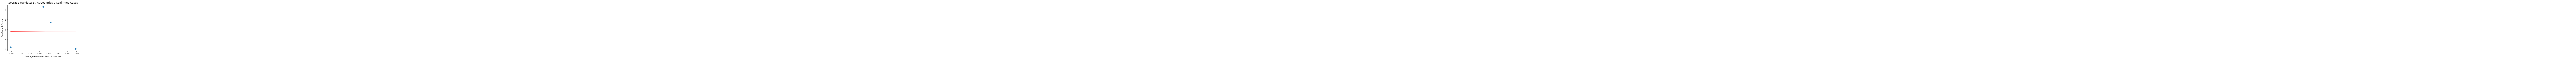

(0.005969848828868585, 0.9940301511711314)

In [20]:
x_values = strict_df['Average Mandate']
y_values = strict_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Cases')
plt.show()

#pearsonr for strict mandates v strict cases
correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Confirmed Cases'])
correlation

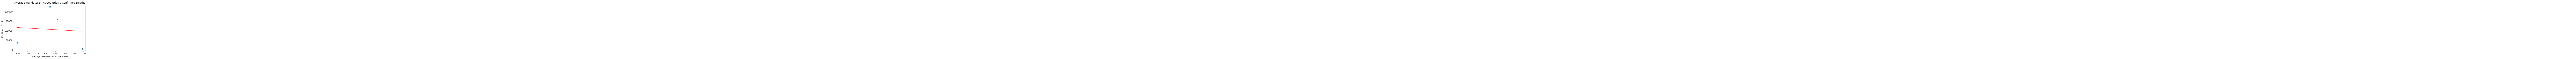

(-0.07862970050620083, 0.9213702994937991)

In [21]:
#linear regression strict mandates v strict deaths
x_values = strict_df['Average Mandate']
y_values = strict_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

#pearsonr for strict mandates v strict deaths
correlation = st.pearsonr(strict_df['Average Mandate'], strict_d['Confirmed Deaths'])
correlation

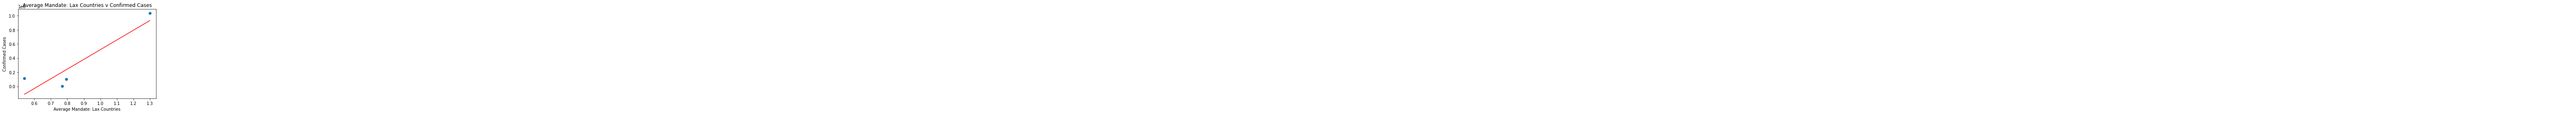

(0.9100025559884284, 0.08999744401157161)

In [22]:
#linear regression relaxed mandates v relaxed cases
x_values = lax_df['Average Mandate']
y_values = lax_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Cases')
plt.show()

#pearsonr for relaxed mandates v relaxed cases
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Confirmed Cases'])
correlation

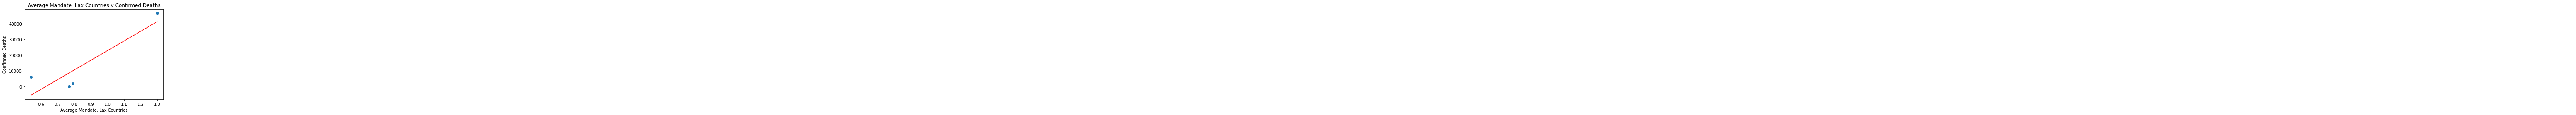

(0.8920745759776134, 0.10792542402238658)

In [23]:
#linear regression relaxed mandates v relaxed deaths
x_values = lax_df['Average Mandate']
y_values = lax_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

#pearsonr for relaxed mandates v relaxed deaths
correlation = st.pearsonr(lax_df['Average Mandate'], lax_d['Confirmed Deaths'])
correlation

In [24]:
# 1.4 was the mean of the 50% column above on .describe(), making the df below the Strict countries
# 1.4 was the mean of the 50% column above on .describe(), making the df below the relax countries
sum_df['Relax vs Strict'] = '' 

# Set multiple conditions and assign reviewer category with .loc
sum_df.loc[(sum_df['Average Mandate']>=1.4), 'Relax vs Strict'] = 'Strict'
sum_df.loc[(sum_df['Average Mandate']<=1.4), 'Relax vs Strict'] = 'Relax'
sum_df

,Country,Average Mandate,Relax vs Strict
0,China,1.995380,Strict
1,Brazil,1.860927,Strict
2,United States,1.820805,Strict
3,Italy,1.645946,Strict
4,United Kingdom,1.298693,Relax
5,Japan,0.792834,Relax
6,New Zealand,0.769024,Relax
7,Sweden,0.540864,Relax


### Countries' Total Cases over Time

In [25]:
# Read in CSV File
cases_df = pd.read_csv("oxford_clean.csv")

# Convert Date object to datetime format
cases_df['Date'] = pd.to_datetime(cases_df['Date'], format='%Y%m%d')

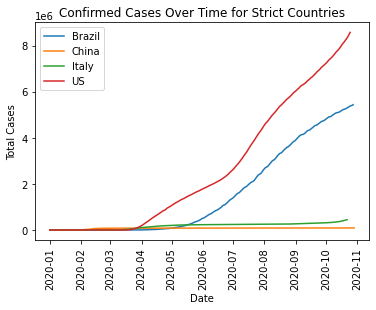

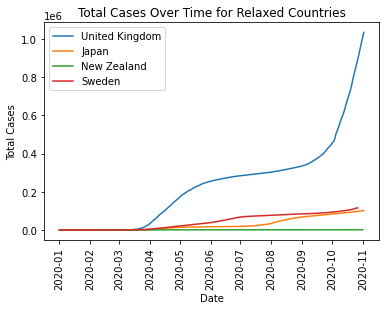

In [26]:
# Locate the Confirmed Cases data for Countries w/ Strict Mandates
fig, ax = plt.subplots()
brazil = cases_df.loc[cases_df['CountryName']=='Brazil']
ax.plot(brazil['Date'],brazil['ConfirmedCases'], label = 'Brazil')
china = cases_df.loc[cases_df['CountryName']=='China']
ax.plot(china['Date'],china['ConfirmedCases'],label='China')
italy = cases_df.loc[cases_df['CountryName']=='Italy']
ax.plot(italy['Date'],italy['ConfirmedCases'],label='Italy')
us = cases_df.loc[cases_df['CountryName']=='United States']
ax.plot(us['Date'],us['ConfirmedCases'],label='US')

# Plot the Confirmed Cases for "Strict" Countries 
plt.xticks(rotation='vertical')
plt.title('Confirmed Cases Over Time for Strict Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/cases_time_strict.png')
plt.show()

# Run the same functions for "Relaxed" Mandates
fig, ax = plt.subplots()
uk = cases_df.loc[cases_df['CountryName']=='United Kingdom']
ax.plot(uk['Date'],uk['ConfirmedCases'],label='United Kingdom')
japan = cases_df.loc[cases_df['CountryName']=='Japan']
ax.plot(japan['Date'],japan['ConfirmedCases'],label='Japan')
nz = cases_df.loc[cases_df['CountryName']=='New Zealand']
ax.plot(nz['Date'],nz['ConfirmedCases'],label='New Zealand')
sweden = cases_df.loc[cases_df['CountryName']=='Sweden']
ax.plot(sweden['Date'],sweden['ConfirmedCases'],label='Sweden')
plt.xticks(rotation='vertical')
plt.title('Total Cases Over Time for Relaxed Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/cases_time_relax.png')
plt.show()

### Countries' Total Deaths over Time¶

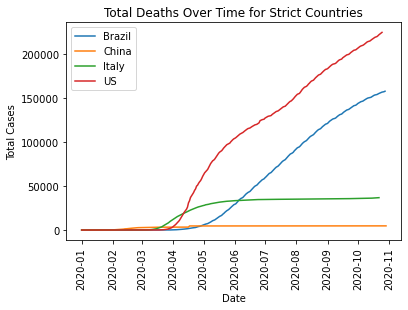

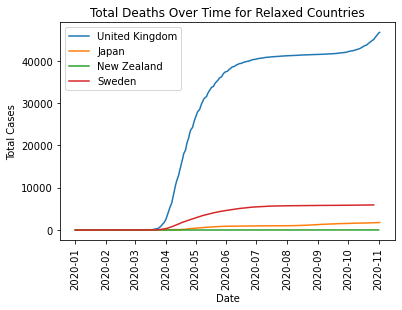

In [27]:
# Locate the Confirmed Deaths for the "Strict Countries"
fig, ax = plt.subplots()
brazil = cases_df.loc[cases_df['CountryName']=='Brazil']
ax.plot(brazil['Date'],brazil['ConfirmedDeaths'], label = 'Brazil')
china = cases_df.loc[cases_df['CountryName']=='China']
ax.plot(china['Date'],china['ConfirmedDeaths'],label='China')
italy = cases_df.loc[cases_df['CountryName']=='Italy']
ax.plot(italy['Date'],italy['ConfirmedDeaths'],label='Italy')
us = cases_df.loc[cases_df['CountryName']=='United States']
ax.plot(us['Date'],us['ConfirmedDeaths'],label='US')

# Plot the Confirmed Deaths for "Strict" Countries
plt.xticks(rotation='vertical')
plt.title('Total Deaths Over Time for Strict Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/deaths_time_strict.png')
plt.show()

# Run the same functions for "Relaxed" Countries
fig, ax = plt.subplots()
uk = cases_df.loc[cases_df['CountryName']=='United Kingdom']
ax.plot(uk['Date'],uk['ConfirmedDeaths'],label='United Kingdom')
japan = cases_df.loc[cases_df['CountryName']=='Japan']
ax.plot(japan['Date'],japan['ConfirmedDeaths'],label='Japan')
nz = cases_df.loc[cases_df['CountryName']=='New Zealand']
ax.plot(nz['Date'],nz['ConfirmedDeaths'],label='New Zealand')
sweden = cases_df.loc[cases_df['CountryName']=='Sweden']
ax.plot(sweden['Date'],sweden['ConfirmedDeaths'],label='Sweden')
plt.xticks(rotation='vertical')
plt.title('Total Deaths Over Time for Relaxed Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/deaths_time_relax.png')
plt.show()

### Determining Countries' Cases and Deaths by Per Capita

In [32]:
#The values below are from "worldometers.info"
# Total populations as of Jan 1, 2020.
braz_pop = 212559417
china_pop = 1408526449
ital_pop = 60005743
jp_pop = 125938348
nz_pop = 4822233
swe_pop = 10151866
uk_pop = 66575226
us_pop = 330380000

# Create a list containing the total populations of each conutry
pops = (212559417, 1408526449, 60005743, 125938348, 4822233, 10151866, 66575226, 330380000)

# Locate the most recent date data is available for all countries
last_df = cases_df.loc[cases_df['Date']=='2020-10-22']

# Add a column to the new DF containing total populations for analysis purposes
last_df["total_pop"] = pops

last_df = last_df.set_index('CountryName')
last_df

<ipython-input-32-b50fac8c1d2f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_df["total_pop"] = pops


,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths,total_pop
CountryName,,,,,,,,,,
Brazil,2020-10-22,3.0,2.0,2.0,1.0,0.000000e+00,4.0,5298772.0,155403.0,212559417
China,2020-10-22,1.0,2.0,3.0,1.0,0.000000e+00,2.0,91044.0,4739.0,1408526449
United Kingdom,2020-10-22,3.0,2.0,1.0,2.0,5.305826e+09,3.0,789229.0,44158.0,60005743
Italy,2020-10-22,1.0,2.0,0.0,1.0,0.000000e+00,3.0,449648.0,36832.0,125938348
Japan,2020-10-22,1.0,1.0,1.0,1.0,0.000000e+00,1.0,94524.0,1685.0,4822233
New Zealand,2020-10-22,0.0,0.0,0.0,2.0,0.000000e+00,1.0,1558.0,25.0,10151866
Sweden,2020-10-22,0.0,1.0,0.0,2.0,0.000000e+00,0.0,109326.0,5917.0,66575226
United States,2020-10-22,3.0,2.0,2.0,2.0,0.000000e+00,4.0,8336282.0,222201.0,330380000


In [33]:
# Calculate the Percentage of Each Country Infected and Deceased
perc_cases = (last_df["ConfirmedCases"]/last_df["total_pop"])
perc_deaths = (last_df["ConfirmedDeaths"]/last_df["total_pop"])

# Create a DataFrame to hold these values
perc_summ = pd.DataFrame({'Percent_Infected':perc_cases, 'Percent_Deceased':perc_deaths})
perc_summ.style.format({"Percent_Infected":"{:.6%}", "Percent_Deceased":"{:.6%}"})

,Percent_Infected,Percent_Deceased
CountryName,,
Brazil,2.492843%,0.073110%
China,0.006464%,0.000336%
United Kingdom,1.315256%,0.073590%
Italy,0.357038%,0.029246%
Japan,1.960171%,0.034942%
New Zealand,0.015347%,0.000246%
Sweden,0.164214%,0.008888%
United States,2.523241%,0.067256%


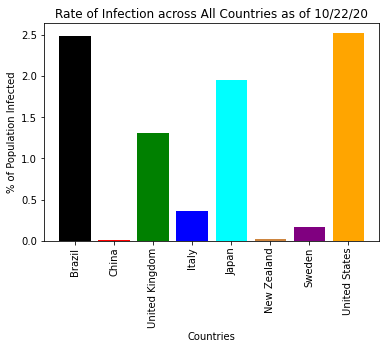

In [34]:
# Rate of Infection across All Countries
plt.bar(perc_summ['Percent_Infected'].index,perc_summ['Percent_Infected']*100,\
        color=['black', 'red', 'green', 'blue', 'cyan','peru','purple','orange'])
plt.xticks(rotation='vertical')
plt.title('Rate of Infection across All Countries as of 10/22/20')
plt.xlabel('Countries')
plt.ylabel('% of Population Infected')
plt.savefig('Figures/cases_perc.png')

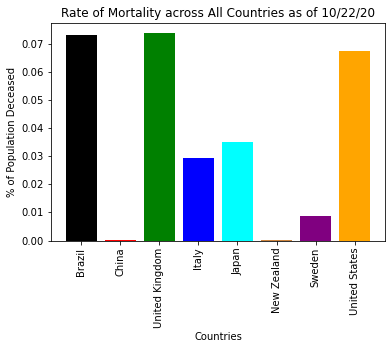

In [35]:
# Rate of Mortality across All Countries
plt.bar(perc_summ['Percent_Infected'].index,perc_summ['Percent_Deceased']*100,\
        color=['black', 'red', 'green', 'blue', 'cyan','peru','purple','orange'])
plt.xticks(rotation='vertical')
plt.title('Rate of Mortality across All Countries as of 10/22/20')
plt.xlabel('Countries')
plt.ylabel('% of Population Deceased')
plt.savefig('Figures/deaths_perc.png')

### Statistical Analysis

###### Testing our Hypothesis for Infection Rate (2-Sample T-Test)

In [36]:
# Determine the mean infection rate for strict countries
strict_inf = perc_summ.iloc[[0,1,3,7],0:1]
strict_mean = strict_inf.mean()
print(f'Strict {strict_mean*100}')

# Determine the mean infection rate for relaxed countries
relax_inf = perc_summ.iloc[[2,4,5,6],0:1]
relax_mean = relax_inf.mean()
print(f'Relaxed {relax_mean*100}')

#Calculate Independent T-test (p-value = 0.05)
# Code for T-test runs but is not printed for formatting purposes.
st.ttest_ind(strict_inf, relax_inf, equal_var=False)
print('The resulting p-value was 0.58177003')

Strict Percent_Infected    1.344896
dtype: float64
Relaxed Percent_Infected    0.863747
dtype: float64
The resulting p-value was 0.58177003


##### Testing our Hypothesis for Mortality Rate (2-Sample T-Test)

In [37]:
# Determine the mean mortality rate for strict countries
strict_dth = perc_summ.iloc[[0,1,3,7],-1:]
strict_mean = strict_dth.mean()
print(f'Strict {strict_mean*100}')

# Determine the mean infection rate for relaxed countries
relax_dth = perc_summ.iloc[[2,4,5,6],-1:]
relax_mean = relax_dth.mean()
print(f'Relaxed {relax_mean*100}')

# Calculate Independent T-test (p-value = 0.05)
# Code for T-test runs but is not printed for formatting purposes.
st.ttest_ind(strict_dth, relax_dth, equal_var=False)
print('The resulting p-value was 0.60168065')

Strict Percent_Deceased    0.042487
dtype: float64
Relaxed Percent_Deceased    0.029416
dtype: float64
The resulting p-value was 0.60168065
